In [1]:
# Support vector binary classifiers  with Linear support vector machines

In [2]:
# Bringing in packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# DataFrame

test_data = pd.DataFrame()

test_data['test'] = [99, 100, 87, 96, 88, 100, 100, 85, 87, 84,
                     12, 25, 75, 58, 69, 74, 72, 63, 70, 39]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

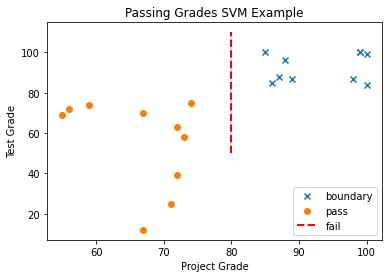

In [4]:
# Reusable function to plot the data 

def setup_plot(): 
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker = "x")
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker = "o")

# Eyeball a pass-fail line to split the points
    plt.plot([80, 80], [50, 110], 'r--', lw = 2)

    plt.xlabel("Project Grade")
    plt.ylabel("Test Grade")

setup_plot()
plt.legend(["boundary", "pass", "fail"], loc = 4)
plt.title("Passing Grades SVM Example")
plt.show()

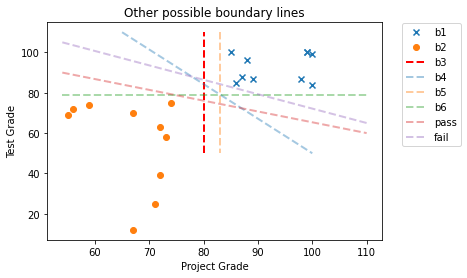

In [5]:
# Trying other possible boundary lines

# Rebuild the previous plot
setup_plot()

# Add some new boundary lines
plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4) #b2
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4) #b3
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4) #b4
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4) #b5
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4) #b6

plt.legend(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'pass', 'fail'],
            bbox_to_anchor=(0.25, 0.02, 1, 1))


plt.title("Other possible boundary lines")
plt.show()

In [6]:
from sklearn.svm import SVC

# Instantiate your model and fit the data

X = test_data[["test", "project"]]
Y = test_data["pass"]
svm = SVC(kernel = "linear")
svm.fit(X, Y)

SVC(kernel='linear')

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


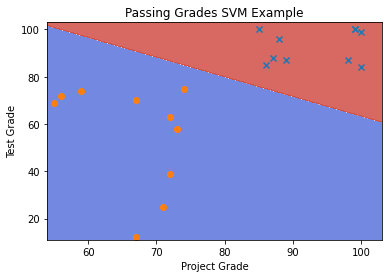

In [7]:
# Visualize your model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()